In [ ]:
#Data Description:
#Amazon Reviews data (data source) The repository has several datasets. 
#For this case study, we are using the Electronics dataset.

#Domain:
#E-commerce

#Online E-commerce websites like Amazon, Flipkart uses different recommendation models to provide different suggestions to different users. 
#Amazon currently uses item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import scipy as sp

In [2]:
#Read the data as a data set
ratings = pd.read_csv('ratings_Electronics.csv',header =None)

In [3]:
ratings.shape

(7824482, 4)

The given data has 7824482 observations and 4 columns

In [11]:
ratings.head()

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


# Adding Columns' Names in the data set provided

In [4]:
ratings.columns =['User_ID','Prod_ID','Rating','Time_Stamp']

In [13]:
ratings.head()

,User_ID,Prod_ID,Rating,Time_Stamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [14]:
ratings.isnull().values.any()

False

In [15]:
ratings.isna().sum()

User_ID       0
Prod_ID       0
Rating        0
Time_Stamp    0
dtype: int64

In [16]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
User_ID       object
Prod_ID       object
Rating        float64
Time_Stamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


We see that in our data there are no Null values and NA

In [21]:
ratings['Rating'].describe()

count    7.824482e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [23]:
print("5 point summary of Rating: \n Minimum = 1 (means that in the data provided the minimum rating provided is 1 ) \n Maximum = 5 (means that in the data provided the maximum rating provided is 5) \n Median (50th percentile) = 5 (It means that when our data is sorted in lowest to highest, the middle most value for rating is 5 \n Lower Quartile (25th percentile) = 3 (means that the 25% of lowest rating has 3 rating or less) \n Upper Quartile (75th percentile) = 5 (means that the 25% of highest rating obdservations has 5 rating)")

5 point summary of Rating: 
 Minimum = 1 (means that in the data provided the minimum rating provided is 1 ) 
 Maximum = 5 (means that in the data provided the maximum rating provided is 5) 
 Median (50th percentile) = 5 (It means that when our data is sorted in lowest to highest, the middle most value for rating is 5 
 Lower Quartile (25th percentile) = 3 (means that the 25% of lowest rating has 3 rating or less) 
 Upper Quartile (75th percentile) = 5 (means that the 25% of highest rating obdservations has 5 rating)


(array([ 901765.,       0.,  456322.,       0.,       0.,  633073.,
              0., 1485781.,       0., 4347541.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

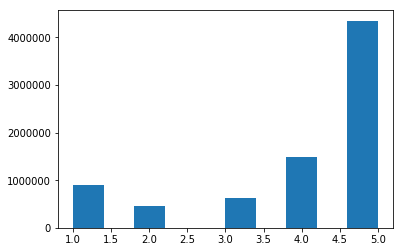

In [26]:
plt.hist(ratings['Rating'])

We see that our data is highly skewed towards left. We have more than 50% data has ratings 5 or more.

# Getting how frequent a user has given ratings

In [12]:
ratings.groupby('User_ID')['Rating'].count().sort_values(ascending=False).head()

User_ID
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: Rating, dtype: int64

# Adding a column for counts for the frequency a user has given ratings

In [5]:
ratings['Counts'] = ratings.groupby(['User_ID'])['Rating'].transform('count')

In [6]:
ratings.head()

,User_ID,Prod_ID,Rating,Time_Stamp,Counts
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200,2
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800,4
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600,1
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200,1
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200,1


# Filtering out the users that have rated less than 50 times

In [7]:
ratings = ratings[ratings.Counts > 49]

In [8]:
ratings.shape

(125871, 5)

# Removing extra columns from Dataframe

In [9]:
ratings_D= ratings.drop(['Time_Stamp','Counts'], axis =1)

In [10]:
ratings_D.head()

,User_ID,Prod_ID,Rating
94,A3BY5KCNQZXV5U,0594451647,5.0
118,AT09WGFUM934H,0594481813,3.0
177,A32HSNCNPRUMTR,0970407998,1.0
178,A17HMM1M7T9PJ1,0970407998,4.0
492,A3CLWR1UUZT6TG,0972683275,5.0


# Splitting data in to Train and Test sets

In [11]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(ratings_D,test_size= 0.30)

# Popularity method for recommendation

This method only recommends the products to any user based on highest average ratings of products

In [17]:
ratings_D.groupby('Prod_ID')['Rating'].mean().sort_values(ascending=False).head(10)

Prod_ID
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
B002R0T03Y    5.0
B002R20X9M    5.0
B002R2KACC    5.0
B002R4NN92    5.0
B002R5ABIW    5.0
Name: Rating, dtype: float64

In [18]:
trainset.groupby('Prod_ID')['Rating'].mean().sort_values(ascending=False).head(10)

Prod_ID
B00LI4ZZO8    5.0
B002RL9XRG    5.0
B002R5UK9W    5.0
B002R6KZLO    5.0
B002R84J28    5.0
B002R8FSWS    5.0
B002REBSGC    5.0
B002RJKVY2    5.0
B002RJNLVW    5.0
B002RL8I2W    5.0
Name: Rating, dtype: float64

In [19]:
testset.groupby('Prod_ID')['Rating'].mean().sort_values(ascending=False).head(10)

Prod_ID
B00LKG1MC8    5.0
B004W9BKE0    5.0
B004WK4TQK    5.0
B004WK3R4U    5.0
B0010AXLO6    5.0
B0010BNV7M    5.0
B004WGKTRM    5.0
B0010CEWDI    5.0
B004WBR8C6    5.0
B004WB7I3K    5.0
Name: Rating, dtype: float64

# Calculating RMSE for Popularity method

# Finding common products between Train and testset

In [43]:
s1 = pd.merge(testset, trainset, how='inner', on=['Prod_ID'])

In [44]:
s1.head()

,User_ID_x,Prod_ID,Rating_x,User_ID_y,Rating_y
0,ABMNX856X89CS,B009HQCAPQ,4.0,A3EZEP0FX5BC1P,4.0
1,ABMNX856X89CS,B009HQCAPQ,4.0,A5QDZEOIMQ4LW,5.0
2,ABMNX856X89CS,B009HQCAPQ,4.0,A12EVK82QUTSA6,3.0
3,ABMNX856X89CS,B009HQCAPQ,4.0,AJX9A4Q19UTJU,4.0
4,ABMNX856X89CS,B009HQCAPQ,4.0,A2503LT8PZIHAD,5.0


In [46]:
s1['Av_rating_x'] = s1.groupby(['Prod_ID'])['Rating_x'].transform('mean')
s1['Av_rating_y'] = s1.groupby(['Prod_ID'])['Rating_y'].transform('mean')

In [47]:
s1.head()

,User_ID_x,Prod_ID,Rating_x,User_ID_y,Rating_y,Av_rating_x,Av_rating_y
0,ABMNX856X89CS,B009HQCAPQ,4.0,A3EZEP0FX5BC1P,4.0,4.0,4.142857
1,ABMNX856X89CS,B009HQCAPQ,4.0,A5QDZEOIMQ4LW,5.0,4.0,4.142857
2,ABMNX856X89CS,B009HQCAPQ,4.0,A12EVK82QUTSA6,3.0,4.0,4.142857
3,ABMNX856X89CS,B009HQCAPQ,4.0,AJX9A4Q19UTJU,4.0,4.0,4.142857
4,ABMNX856X89CS,B009HQCAPQ,4.0,A2503LT8PZIHAD,5.0,4.0,4.142857


In [48]:
RMSE = np.square(np.subtract(s1.Av_rating_x,s1.Av_rating_y)).mean() 
print(RMSE)

0.2241183881027545


# Collaborative method using user-user collaboration for recommendation

In [12]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

In [13]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_D[['User_ID','Prod_ID','Rating']], reader)
trainset, testset = train_test_split(data, test_size=.30)
Col_rec = KNNWithMeans(k=100, sim_options={'name': 'pearson_baseline', 'user_based': True})
Col_rec.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [17]:
# run the trained model against the testset
test_pred = Col_rec.test(testset)

In [18]:
test_pred

[Prediction(uid='A2BYV7S1QP2YIG', iid='B00KWL62QI', r_ui=5.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='ALUNVOQRXOZIA', iid='B00004Y7TC', r_ui=5.0, est=3.58974358974359, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1UQBFCERIP7VJ', iid='B000ZJZ7OA', r_ui=5.0, est=4.548571428571429, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1CMD08Z49PGKQ', iid='B001PUSERA', r_ui=5.0, est=4.815789473684211, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3V15SFD7918WZ', iid='B00GY0UFFA', r_ui=5.0, est=2.946190476190476, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='AFQBS241UKPAZ', iid='B000GLIIFW', r_ui=4.0, est=4.142857142857143, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1O229NVVDJUX2', iid='B0030MIU16', r_ui=4.0, est=4.827283869396484, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='A1EH2S92FHWZRP', iid='B005J2F7NE', r_ui=2.0, est=4

# Calculating RMSE for user-user collaborative filter

In [19]:
print("User-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-based Model : Test Set
RMSE: 1.0529


1.0528730943434768

# Tuning the parameter for the user-user Collaborative filtering model

In [16]:
from surprise.model_selection import GridSearchCV
data = Dataset.load_from_df(ratings_D[['User_ID','Prod_ID','Rating']], reader)
sim_options = {
    "name": ["msd","pearson_baseline", "cosine"],
    "min_support": [3, 4, 5],
    "user_based": [True],
}

param_grid = {"sim_options": sim_options}

gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity 

# Collaborative filter using SVD

In [20]:
from collections import defaultdict
from surprise import SVD

In [21]:
algo = SVD()
algo.fit(trainset)

In [22]:
predictions = algo.test(testset)

# Tuning parameters for SVD collaborative filter

In [23]:
param_grid = {
    "n_epochs": [5, 10],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

0.9892448282778822
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


# Recommending 5 new products for each user based on his/her habits

In [33]:
def get_top_k(predictions,k):
    # First map the predictions to each user.
    top_k = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_k[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_k.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_k[uid] = user_ratings[:k]

    return top_k

In [34]:
top_k = get_top_k(predictions, k=5)

In [35]:
top_k

defaultdict(list,
            {'A2BYV7S1QP2YIG': [('B00DR6DQZA', 5),
              ('B00B7E1D7W', 5),
              ('B00G4UQ6U8', 4.943347805064697),
              ('B00A0JUNWQ', 4.9431481730533715),
              ('B009DMFOVG', 4.935034129752457)],
             'ALUNVOQRXOZIA': [('B0017H4G0A', 3.8655108074597617),
              ('B0012S4APK', 3.8615893066880913),
              ('B001ES5D5Y', 3.795362852620702),
              ('B0033BU0F8', 3.775647666824548),
              ('B003ZX871I', 3.6725284700839236)],
             'A1UQBFCERIP7VJ': [('B00834SJSK', 5),
              ('B005DSPLCQ', 4.890392789221848),
              ('B00G4V0QSK', 4.861408372335288),
              ('B00G4UQ6U8', 4.8542489042089105),
              ('B0079UAT0A', 4.8459805242883744)],
             'A1CMD08Z49PGKQ': [('B0099SMFVQ', 5),
              ('B001V9KG0I', 5),
              ('B004286VMW', 5),
              ('B00GJFGDUQ', 5),
              ('B006LW0W5Y', 5)],
             'A3V15SFD7918WZ': [('B00829THO6', 4.

In [36]:
# Print the recommended items for each user
for uid, user_ratings in top_k.items():
    print(uid, [iid for (iid, _) in user_ratings])

A2BYV7S1QP2YIG ['B00DR6DQZA', 'B00B7E1D7W', 'B00G4UQ6U8', 'B00A0JUNWQ', 'B009DMFOVG']
ALUNVOQRXOZIA ['B0017H4G0A', 'B0012S4APK', 'B001ES5D5Y', 'B0033BU0F8', 'B003ZX871I']
A1UQBFCERIP7VJ ['B00834SJSK', 'B005DSPLCQ', 'B00G4V0QSK', 'B00G4UQ6U8', 'B0079UAT0A']
A1CMD08Z49PGKQ ['B0099SMFVQ', 'B001V9KG0I', 'B004286VMW', 'B00GJFGDUQ', 'B006LW0W5Y']
A3V15SFD7918WZ ['B00829THO6', 'B001OI2Z4Q', 'B0034CL2ZI', 'B00CRY250U', 'B005H7TMA0']
AFQBS241UKPAZ ['B00007E7K1', 'B0039NLS3I', 'B00CB2F65O', 'B003XM73P2', 'B000GLIIFW']
A1O229NVVDJUX2 ['B005HSDLCO', 'B006W8U2MU', 'B00FPKDPZC', 'B00284ALF0', 'B0007LJHVA']
A1EH2S92FHWZRP ['B004CLYEDC', 'B000EXRSVM', 'B009SYZ8OC', 'B002XITTS6', 'B00466X9SY']
A2NX6PABLIJLP1 ['B0054JJ0QW', 'B009UEAZ84', 'B006QB1RPY', 'B004BLK24S', 'B0007RV3IE']
A38NHXL5257E3B ['B00EOE4G4E', 'B00BUER7EC', 'B004XC6GJ0', 'B00466X9SY', 'B00007M1TZ']
A3FBM0RMCMAABV ['B00F1CRTLK', 'B008ULPA2O', 'B00834SJSK', 'B00CF5OHZ2', 'B00EU9V3S0']
A1J5HIF41ENSMZ ['B006U3O566', 'B005NCNDOU', 'B00HFRWWAM'

# Summary for recommendations using Popularity based, Collaborative filter using user-user and SVD:

# There is no method for calculating the RMSE for popularity recommendor system, as it always recommend the popular products irrespective of user profile. But we will use the common products in Train and Test data and compare the average Rating for common products in both data sets, then we will compare how far off the ratings fall if we use just average ratings on randomly chose sample to recommend. It may not be the perfect way of calclating the RMSE but for popular recommender and to compare with other methods, we will have to use this method.

# Seeing the above RMSEs for Popularity based, Collaborative methods using user-user and SVD. 
# We can say that our data is very sparse and has alot of new users. Though manual method for calculating RMSE with Popularity based method reveals better RMSE than SVD and user-user, but it is due to the data we have or because we want to use RMSE for popularity whih ideally has no signficance. 
# If we talk abot only collaborative methods, than clearly SVD has better results. As it takes care of user and item both's profile in unison as compared to ony user-user or item-item.

# Hence, we have recommended 5 new products to users based on SVD instead of popularity method, as popularity method would only recommend same 5 products to all users